In [165]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime as dt


In [166]:
df = pd.read_csv('second_batch.csv')


In [167]:
df.head()


,measurement_id,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_measured_at,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,22288,2023-06-06 15:31:18.631700,59.06,167.46,70.75,2023-06-06 15:30:00.000000,34,0.0,0,25.0,5.0,1018.0
1,22285,2023-06-06 15:26:16.913879,59.61,167.59,70.80,2023-06-06 15:15:00.000000,30,0.0,0,26.0,5.0,1018.0
2,22282,2023-06-06 15:21:15.136985,59.03,167.53,70.74,2023-06-06 15:15:00.000000,30,0.0,0,26.0,5.0,1018.0
3,22279,2023-06-06 15:16:13.456169,59.89,167.49,70.78,2023-06-06 15:15:00.000000,30,0.0,0,26.0,5.0,1018.0
4,22276,2023-06-06 15:11:11.770897,58.97,167.36,70.46,2023-06-06 15:00:00.000000,32,0.0,0,26.0,5.0,1018.0


In [168]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   measurement_id         5356 non-null   int64  
 1   measured_at            5356 non-null   object 
 2   s1_humidity            5356 non-null   float64
 3   s2_humidity            5356 non-null   float64
 4   s3_humidity            5356 non-null   float64
 5   weather_measured_at    5356 non-null   object 
 6   weather_humidity       5356 non-null   int64  
 7   weather_precipitation  5356 non-null   float64
 8   weather_cloud          5356 non-null   int64  
 9   weather_temperature    5356 non-null   float64
 10  weather_uv_index       5356 non-null   float64
 11  weather_pressure       5356 non-null   float64
dtypes: float64(7), int64(3), object(2)
memory usage: 502.2+ KB


In [169]:
df.describe()


,measurement_id,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
count,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000,5356.000000
mean,14253.405900,64.947668,161.177397,82.866107,61.902166,0.005564,17.483757,15.718633,3.660941,1021.670463
std,4641.010728,8.899056,24.274259,11.499307,18.011391,0.065271,31.933227,4.643379,2.108463,3.616782
min,6206.000000,3.650000,6.730000,0.000000,22.000000,0.000000,0.000000,4.000000,1.000000,1013.000000
25%,10237.250000,58.290000,167.087500,80.360000,48.000000,0.000000,0.000000,12.000000,1.000000,1020.000000
50%,14253.500000,65.260000,169.440000,83.610000,63.000000,0.000000,0.000000,16.000000,4.000000,1021.000000
75%,18271.750000,72.090000,170.860000,88.932500,77.000000,0.000000,25.000000,19.000000,5.000000,1024.000000
max,22288.000000,89.430000,179.420000,99.010000,100.000000,1.400000,100.000000,26.000000,7.000000,1029.000000


In [170]:
df['measured_at'] = df['measured_at'].apply(lambda x: str(x).split('.')[0])
df['measured_at'] = pd.to_datetime(df['measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

df['weather_measured_at'] = df['weather_measured_at'].apply(lambda x: str(x).split('.')[0])
df['weather_measured_at'] = pd.to_datetime(df['weather_measured_at'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


In [171]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5356 entries, 0 to 5355
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   measurement_id         5356 non-null   int64         
 1   measured_at            5356 non-null   datetime64[ns]
 2   s1_humidity            5356 non-null   float64       
 3   s2_humidity            5356 non-null   float64       
 4   s3_humidity            5356 non-null   float64       
 5   weather_measured_at    5356 non-null   datetime64[ns]
 6   weather_humidity       5356 non-null   int64         
 7   weather_precipitation  5356 non-null   float64       
 8   weather_cloud          5356 non-null   int64         
 9   weather_temperature    5356 non-null   float64       
 10  weather_uv_index       5356 non-null   float64       
 11  weather_pressure       5356 non-null   float64       
dtypes: datetime64[ns](2), float64(7), int64(3)
memory usage: 502.2

In [172]:
df.head()


,measurement_id,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_measured_at,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure
0,22288,2023-06-06 15:31:18,59.06,167.46,70.75,2023-06-06 15:30:00,34,0.0,0,25.0,5.0,1018.0
1,22285,2023-06-06 15:26:16,59.61,167.59,70.80,2023-06-06 15:15:00,30,0.0,0,26.0,5.0,1018.0
2,22282,2023-06-06 15:21:15,59.03,167.53,70.74,2023-06-06 15:15:00,30,0.0,0,26.0,5.0,1018.0
3,22279,2023-06-06 15:16:13,59.89,167.49,70.78,2023-06-06 15:15:00,30,0.0,0,26.0,5.0,1018.0
4,22276,2023-06-06 15:11:11,58.97,167.36,70.46,2023-06-06 15:00:00,32,0.0,0,26.0,5.0,1018.0


In [173]:
df[df.isna().any(axis=1)]


,measurement_id,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_measured_at,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure


In [174]:
df.drop(columns=["weather_measured_at", "measurement_id"], inplace=True)

In [175]:
df = df.groupby(pd.Grouper(key='measured_at', freq='4H')).mean(numeric_only=True)

df.reset_index(inplace=True)

In [176]:
sensors = ['s1', 's2', 's3']

for sensor in sensors:
    df[f'{sensor}_humidity_change'] = df[f'{sensor}_humidity'].diff()


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

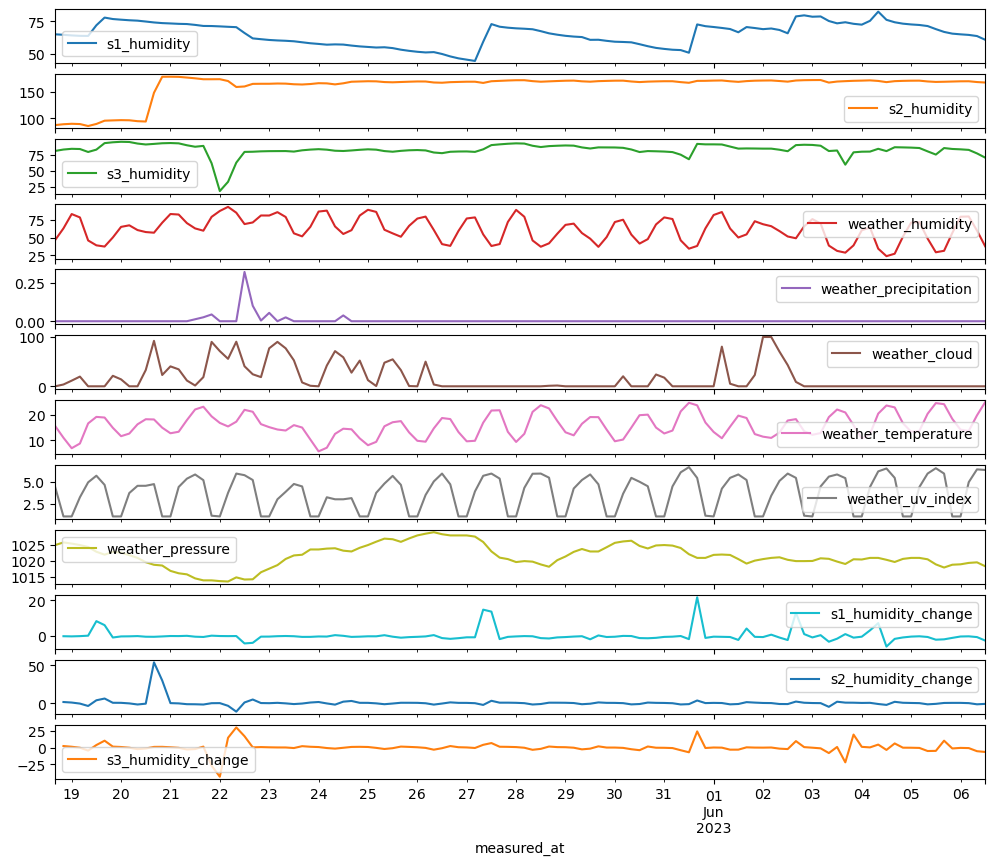

In [177]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


In [178]:
# Print df where humidity_change is is greater than 0.1 AND weather_precipitation is less than 0.1
df[(df['s1_humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0)]


,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
5,2023-05-19 12:00:00,71.866250,89.695417,83.014375,39.291667,0.0,0.000000,19.083333,5.750000,1022.916667,8.185625,3.844792,3.685000
6,2023-05-19 16:00:00,77.774894,95.851915,93.190851,37.553191,0.0,0.000000,18.829787,4.680851,1022.000000,5.908644,6.156498,10.176476
34,2023-05-24 08:00:00,57.198750,163.972917,81.282500,66.062500,0.0,71.354167,12.458333,3.000000,1024.000000,0.230239,-1.903466,-1.644947
40,2023-05-25 08:00:00,54.988936,168.321277,80.735319,61.361702,0.0,47.872340,15.425532,4.829787,1027.000000,0.198311,-1.351015,-2.211556
46,2023-05-26 08:00:00,51.261875,167.516875,78.500625,61.104167,0.0,3.645833,14.604167,5.083333,1029.000000,0.248125,-1.860208,-3.265208
52,2023-05-27 08:00:00,59.194348,166.700652,83.460000,54.826087,0.0,0.000000,16.826087,5.739130,1025.956522,14.713284,-2.278071,3.999362
53,2023-05-27 12:00:00,72.779583,169.879792,90.111250,38.333333,0.0,0.000000,21.562500,6.000000,1023.020833,13.585236,3.179139,6.651250
78,2023-05-31 16:00:00,72.525106,170.532128,91.994043,38.425532,0.0,0.000000,23.595745,5.489362,1021.000000,21.740315,3.572544,24.063834
84,2023-06-01 16:00:00,70.493958,170.115833,84.878333,54.812500,0.0,0.000000,18.645833,5.250000,1019.229167,3.993125,1.395833,0.266250
87,2023-06-02 04:00:00,69.394583,171.337708,84.555625,66.437500,0.0,100.000000,10.895833,3.416667,1021.000000,0.499167,0.152708,-0.008542


In [179]:
# Set humidity_change to 0 where humidity_change is greater than 0.1 AND weather_precipitation is less than 0.1
for sensor in sensors:
    df.loc[(df[f'{sensor}_humidity_change'] > 0.1) & (df['weather_precipitation'] <= 0), f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].median()


array([<Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>,
       <Axes: xlabel='measured_at'>, <Axes: xlabel='measured_at'>],
      dtype=object)

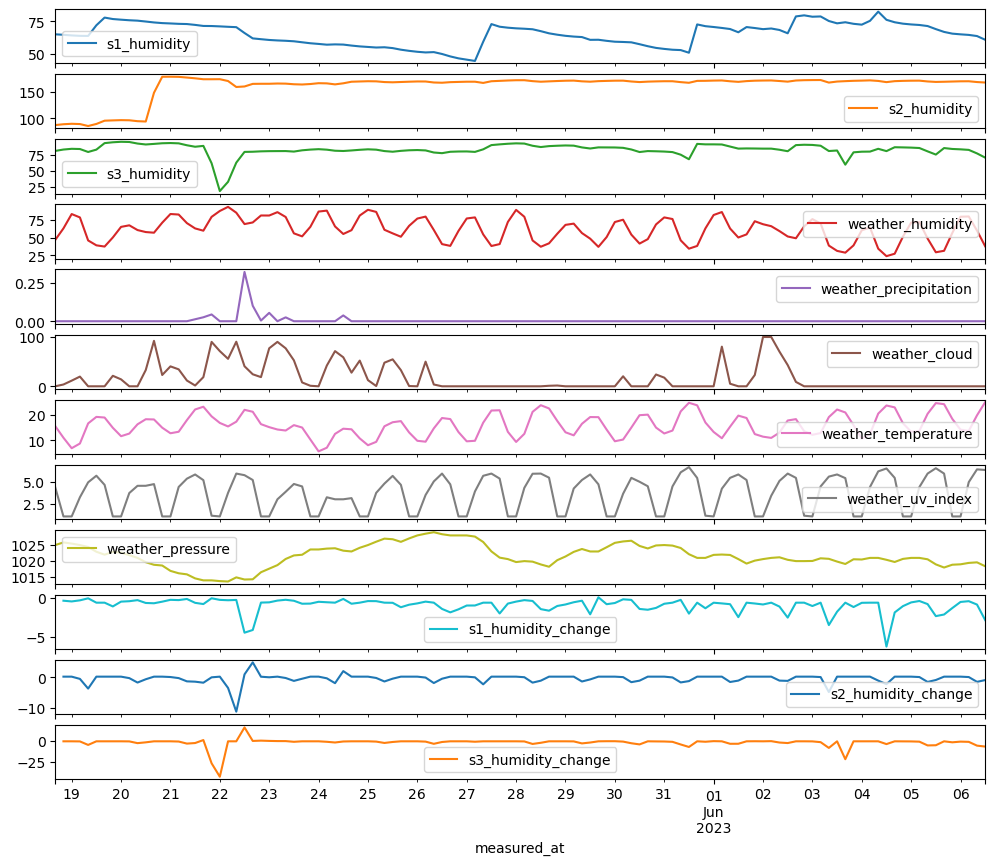

In [180]:
df.plot(x='measured_at', subplots=True, figsize=(12, 10))


In [181]:
df.describe()

,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,113.000000,113.000000,113.000000
mean,65.032944,161.163981,82.843929,61.613270,0.005454,17.295699,15.756854,3.670429,1021.661426,-0.959487,-0.390696,-1.704746
std,8.658048,24.034775,10.057256,17.190909,0.032029,27.976786,4.444756,2.052989,3.589460,0.921587,1.484046,5.608011
min,44.481064,85.850625,18.064375,23.937500,0.000000,0.000000,5.645833,1.000000,1013.645833,-6.265419,-11.169056,-43.640833
25%,58.781707,166.984844,80.350019,49.031250,0.000000,0.000000,12.638298,1.000000,1019.708887,-1.077708,-0.898852,-1.456555
50%,65.700038,169.412611,83.350652,62.253768,0.000000,0.000000,15.312500,4.431516,1021.000000,-0.631077,0.216968,-0.200089
75%,72.145957,170.676443,88.778141,76.570146,0.000000,23.697917,18.994792,5.497340,1024.132535,-0.493280,0.216968,-0.200089
max,82.335106,178.350000,95.289167,93.875000,0.318750,100.000000,24.860465,6.750000,1029.000000,0.061042,4.869583,16.840922


In [182]:
thresh = 4
df[(df["s1_humidity_change"] < -thresh) | (df["s1_humidity_change"] > thresh)]



,measured_at,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
23,2023-05-22 12:00:00,65.935208,160.043333,79.446667,69.458333,0.31875,40.625,21.833333,5.81250,1014.270833,-4.482238,0.958014,16.840922
24,2023-05-22 16:00:00,61.798125,164.912917,79.701875,71.750000,0.10000,24.375,21.083333,5.25000,1014.333333,-4.137083,4.869583,0.255208
101,2023-06-04 12:00:00,76.069688,168.192187,80.681250,23.937500,0.00000,0.000,23.531250,6.59375,1020.406250,-6.265419,-2.236110,-3.614707


In [183]:
# Set humidity_change to the mean where is in the range of the threshold
for sensor in sensors:
    df.loc[(df[f'{sensor}_humidity_change'] < -thresh) | (df[f'{sensor}_humidity_change'] > thresh), f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].mean()

In [184]:
df.describe()

,s1_humidity,s2_humidity,s3_humidity,weather_humidity,weather_precipitation,weather_cloud,weather_temperature,weather_uv_index,weather_pressure,s1_humidity_change,s2_humidity_change,s3_humidity_change
count,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,114.000000,113.000000,113.000000,113.000000
mean,65.032944,161.163981,82.843929,61.613270,0.005454,17.295699,15.756854,3.670429,1021.661426,-0.853237,-0.302887,-0.779599
std,8.658048,24.034775,10.057256,17.190909,0.032029,27.976786,4.444756,2.052989,3.589460,0.620977,0.858546,0.953180
min,44.481064,85.850625,18.064375,23.937500,0.000000,0.000000,5.645833,1.000000,1013.645833,-3.504059,-3.672566,-3.614707
25%,58.781707,166.984844,80.350019,49.031250,0.000000,0.000000,12.638298,1.000000,1019.708887,-0.997708,-0.681042,-1.644947
50%,65.700038,169.412611,83.350652,62.253768,0.000000,0.000000,15.312500,4.431516,1021.000000,-0.631077,0.216968,-0.214837
75%,72.145957,170.676443,88.778141,76.570146,0.000000,23.697917,18.994792,5.497340,1024.132535,-0.493280,0.216968,-0.200089
max,82.335106,178.350000,95.289167,93.875000,0.318750,100.000000,24.860465,6.750000,1029.000000,0.061042,2.021250,1.340851


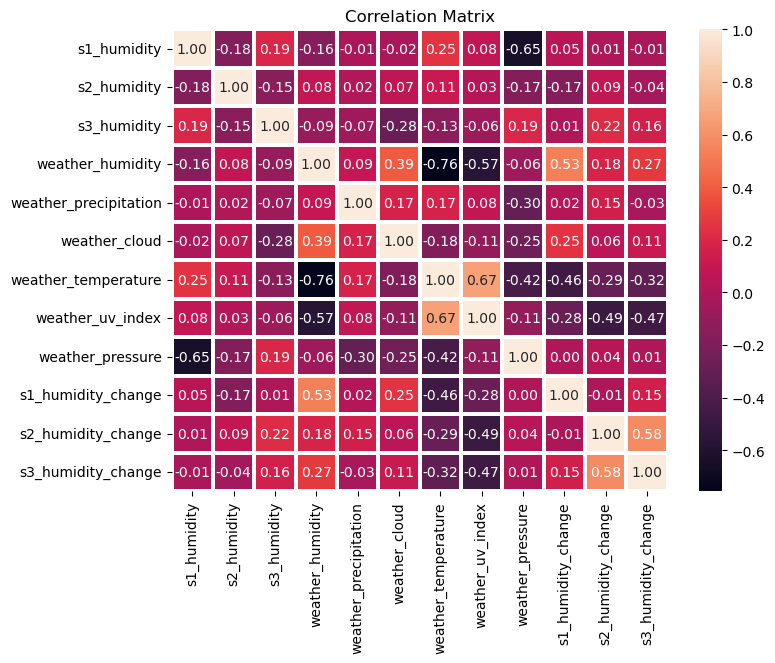

In [185]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [186]:
# # Get the mean and standard deviation of the humidity_change column
# mean, std = df['s1_humidity_change'].mean(), df['s1_humidity_change'].std()

# thresh = 4 * std

# # Show the outlier values
# df[(df["s1_humidity_change"] < mean - thresh) | (df["s1_humidity_change"] > mean + thresh)]

# # Remove the outlier values
# df.loc[(df["s1_humidity_change"] < mean - thresh) | (df["s1_humidity_change"] > mean + thresh), "s1_humidity_change"] = 0


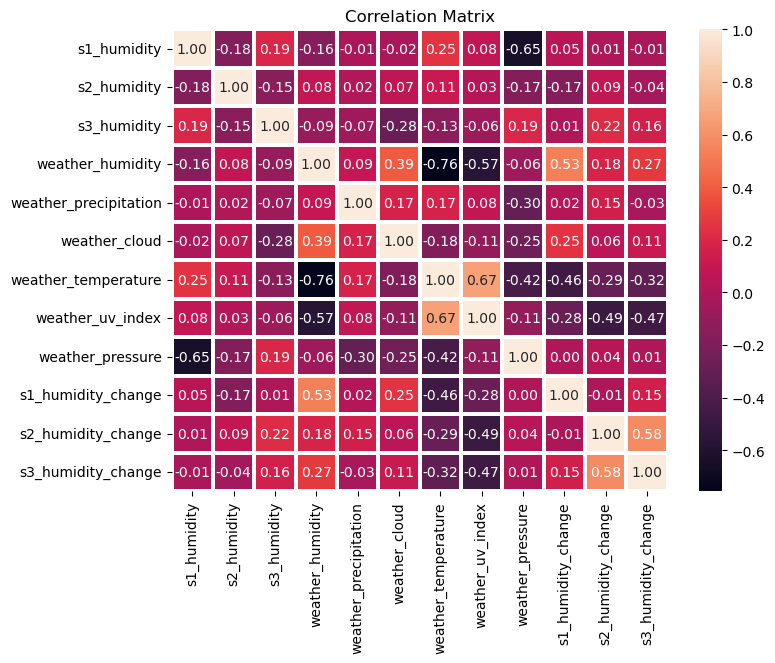

In [187]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

In [188]:
for sensor in sensors:
    # Shift humidity_change by 1 to the right
    df[f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].shift(1)
    # Set the NA values to the mean
    df.loc[df[f'{sensor}_humidity_change'].isna(), f'{sensor}_humidity_change'] = df[f'{sensor}_humidity_change'].mean()

In [189]:
df.drop(columns=["s1_humidity", "s2_humidity", "s3_humidity"], inplace=True)

In [190]:
df['humidity_change'] = df[['s1_humidity_change', 's3_humidity_change']].mean(axis=1)


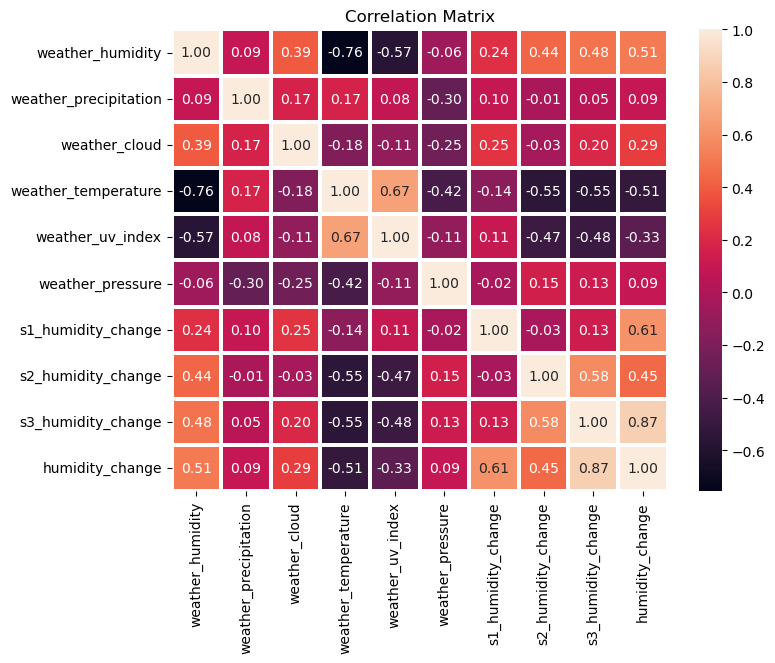

In [191]:
# Calculate the correlation matrix
corr_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
# Use seaborn to make the heatmap
sn.heatmap(corr_matrix, annot=True, linewidths=1.5, fmt=".2f")

plt.title('Correlation Matrix')
plt.show()

# Machine learning part

In [192]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import sklearn.metrics as metrics

# Assuming your DataFrame is named 'df'
# Extract input features (X) and target variable (y)
X = df[['weather_precipitation', 'weather_temperature', 'weather_humidity', 'weather_uv_index']]
# X = df[['weather_temperature', 'weather_humidity', 'weather_uv_index']]
y = df['humidity_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform any necessary preprocessing steps
# For example, handle missing values or scale numeric features using sklearn's preprocessing functions

# Choose a machine learning algorithm (e.g., Linear Regression)
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

Mean Squared Error: 0.23300220268445723
Root Mean Squared Error: 0.48270301706583235


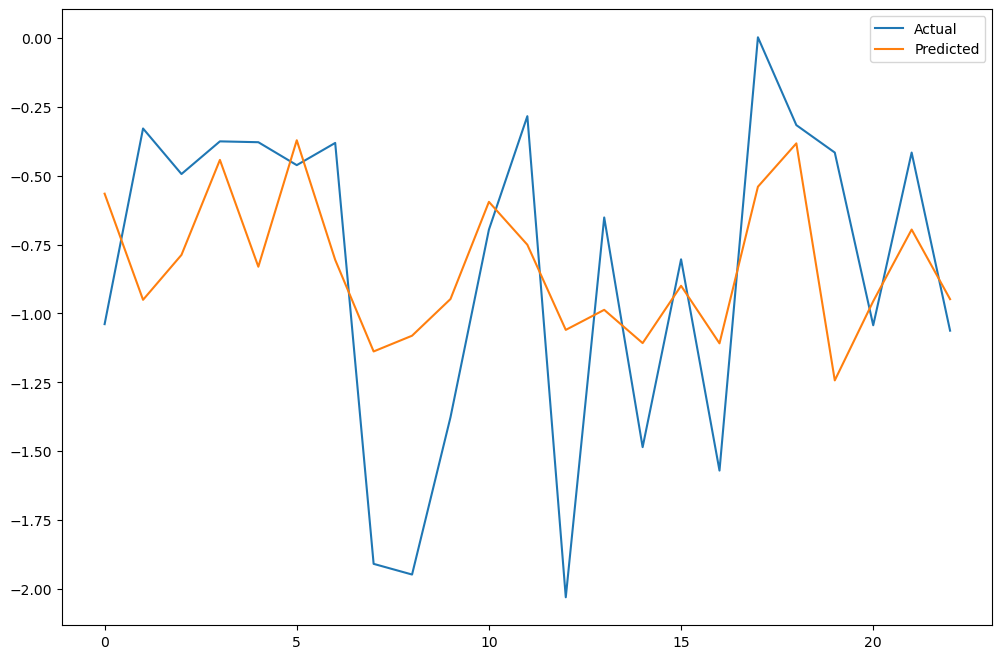

In [193]:
# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

# Plot the predictions against the actual values
plt.figure(figsize=(12, 8))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.show()

In [201]:

rand_idx = np.random.randint(0, len(y_pred))

print("Actual: \n", X_test.iloc[rand_idx])
print("\n\nActual: {:.4f} (Hum% / 4hours)".format(y_test.values[rand_idx]))
print("\n\nPredicted: {:.4f} (Hum% / 4hours)".format(y_pred[rand_idx]))


Actual: 
 weather_precipitation     0.000000
weather_temperature      19.680851
weather_humidity         60.255319
weather_uv_index          6.489362
Name: 112, dtype: float64


Actual: -0.6514 (Hum% / 4hours)


Predicted: -0.9868 (Hum% / 4hours)
